<a href="https://colab.research.google.com/github/AilingLiu/clustering_in_sklearn/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering is popular technique used in customer segmentation, fraud detection, dimension reduction, etc.

We will be using K-means, and DBSCAN to implement clustering.

# set up

In [0]:
import sys
assert(sys.version_info > (3, 5))
import sklearn
assert sklearn.__version__ >= '0.20'

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


import warnings
warnings.filterwarnings(action='ignore', message='^internal_gesld')

# K Means

In [0]:
from sklearn.datasets import make_blobs
import numpy as np
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [0]:
X, y = make_blobs(n_samples=2000, n_features=5, cluster_std=blob_std, centers=blob_centers)

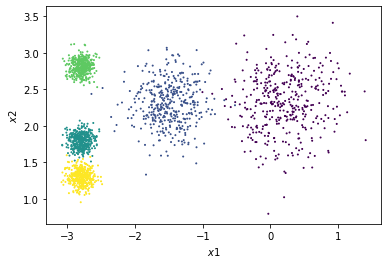

In [21]:
def plot_blob(X, y):
  plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
  plt.xlabel('$x1$', fontsize=10)
  plt.ylabel('$x2$', fontsize=10)

plot_blob(X, y)

In [0]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [26]:
y_pred is kmeans.labels_ #kmeans store the prediction labels

True

In [27]:
kmeans.cluster_centers_

array([[ 0.22255483,  2.32192448],
       [-2.78697292,  2.8041227 ],
       [-2.79329733,  1.8008228 ],
       [-1.47165759,  2.30647946],
       [-2.79181875,  1.30040322]])

#  inertia

Inertia is the sum of the squared distances between each training instance and its closest centroid.

In [30]:
# in sklearn 'the larger the better', hence the negative sign
kmeans.score(X)

-213.76087464267954

In [32]:
# inertia the smaller the better
kmeans.inertia_

213.7608746426789

# choosing optimal k clusters

In [0]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

[1, 8, 0, 1000]

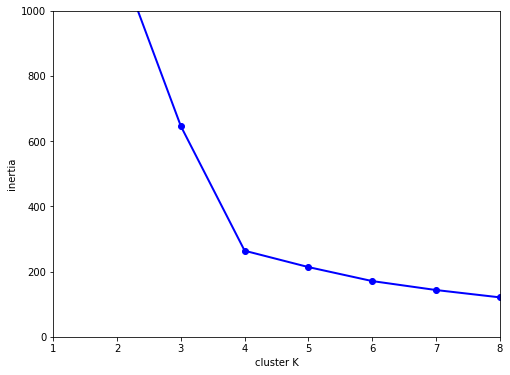

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertias, 'bo-', linewidth=2)
plt.xlabel('cluster K')
plt.ylabel('inertia')
plt.axis([1, 8, 0, 1000])

Based on above elbow shape, we can see at k=4, the slop of inertia starts to become much smaller than k=4.

# silhouette score

Another method is to use silhouette score to measure the ratio of average instance within cluster and average distance between other clusters.

In [38]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6560516385292617

In [0]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

Text(0, 0.5, 'silhouette score')

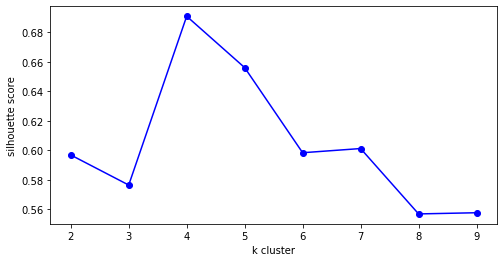

In [44]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('k cluster')
plt.ylabel('silhouette score')

# sihouette diagram

This is the best way to visualize clusters. It shows the total sample size in each cluster, and sihouette scores as well.

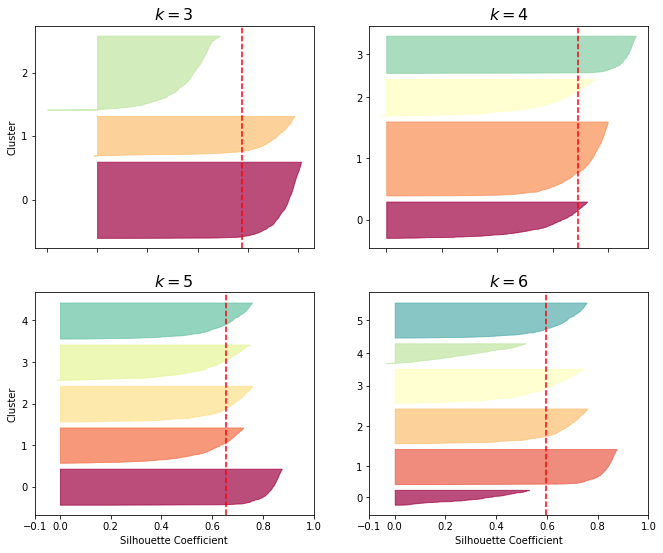

In [46]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


plt.show()

when cluster k=5, each cluster's sample size is more equal than k=4. 

# DBSCAN

We will need to provide a ditance parameter $\epsilon$ as a region to locate nearby instances. And min_samples that each region have to select the core_instance.

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

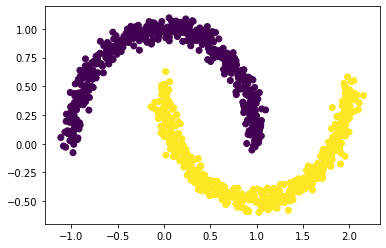

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [50]:
dbscan.labels_[:10]

array([-1,  0,  1,  1,  1,  2, -1,  1,  3,  1])

-1 label indicates outliers.

In [51]:
dbscan.components_ # these are the points that are not considered anomalies

array([[ 1.04445327,  0.16616271],
       [-0.00483217,  0.31179863],
       [ 0.19789205, -0.07006523],
       ...,
       [ 1.63567505, -0.28459438],
       [ 1.98389167,  0.22867654],
       [ 0.11133005,  1.00705534]])

In [54]:
dbscan.core_sample_indices_[:10] # and these are the core components' indices

array([ 1,  3,  4,  5,  7,  8, 10, 11, 12, 13])

In [55]:
# training model using the clustered datasets
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, y[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [56]:
X_new = np.array([[-.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [57]:
knn.predict_proba(X_new)

array([[0.78, 0.22],
       [0.04, 0.96],
       [0.68, 0.32],
       [0.  , 1.  ]])